<a href="https://colab.research.google.com/github/Kristina-Analyst/Python/blob/main/Customer_Segmentation_with_K_median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Онлайн-магазин хоче провести сегментацію клієнтів за двома характеристиками:

purchases — кількість покупок протягом певного періоду;
spending — кількість витрачених грошей протягом цього ж періоду (USD).
Твоє завдання:

Створи датафрейм зі стовпцями purchases та spending.

Застосуй алгоритм K-median для кластеризації клієнтів. Обери кількість кластерів 2 та манхеттенську метрику. Візуалізуй отриманий результат.

Підбери оптимальну кількість кластерів, використовуючи метрику інерції та правило ліктя.

Застосуй алгоритм K-means з оптимальною кількістю кластерів. Візуалізуй результат.

Як змінилися результати кластеризації порівняно з алгоритмом K-means? Як можна охарактеризувати отримані сегменти?
***
0 - ті хто витрачає середньо
1 - ті хто витрачає багато
2 - ті хто витрачає мало


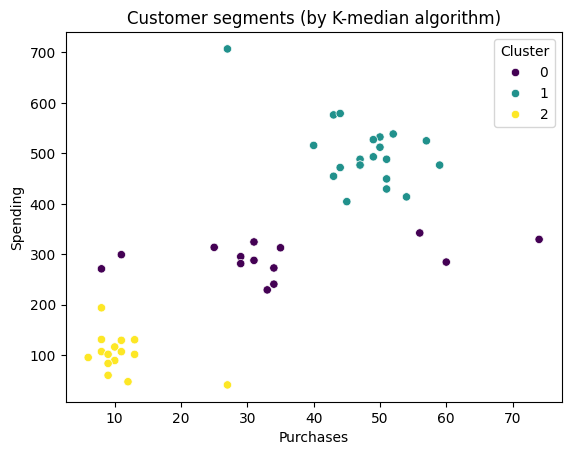

In [ ]:

import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import pandas as pd
import seaborn as sns
purchases = [
    57.0, 49.0, 50.0, 43.0, 47.0, 51.0, 44.0, 52.0, 47.0, 49.0, 47.0, 59.0, 50.0,
    45.0, 54.0, 44.0, 51.0, 40.0, 43.0, 51.0, 74.0, 27.0, 29.0, 31.0, 34.0, 8.0,
    29.0, 56.0, 25.0, 33.0, 35.0, 60.0, 34.0, 31.0, 27.0, 8.0, 13.0, 11.0, 8.0,
    12.0, 10.0, 13.0, 8.0, 9.0, 9.0, 6.0, 11.0, 11.0, 10.0, 9.0
]

spending = [
     524.84, 493.09, 532.38, 576.15, 488.29, 488.29, 578.96, 538.37, 476.53, 527.13,
     476.83, 476.71, 512.1, 404.34, 413.75, 471.89, 449.36, 515.71, 454.6, 429.38,
     329.54, 706.85, 295.37, 287.96, 240.86, 271.21, 281.57, 342.28, 313.74, 229.48,
     312.96, 284.6, 272.92, 324.47, 41.24, 107.23, 130.76, 299.28, 131.29, 47.61,
     116.44, 101.74, 194.02, 101.84, 60.25, 95.61, 107.14, 129.56, 89.63, 83.83
]

df = pd.DataFrame({"purchases":purchases, "spending":spending})

kmedoids = KMedoids(n_clusters= 3, metric= "manhattan", random_state= 2024)
df["cluster"] = kmedoids.fit_predict(df)

sns.scatterplot(
    data=df,
    x="purchases",
    y="spending",
    hue="cluster",
    palette="viridis"
)
plt.title("Customer segments (by K-median algorithm)")
plt.xlabel("Purchases")
plt.ylabel("Spending")
plt.legend(title="Cluster")
plt.show()

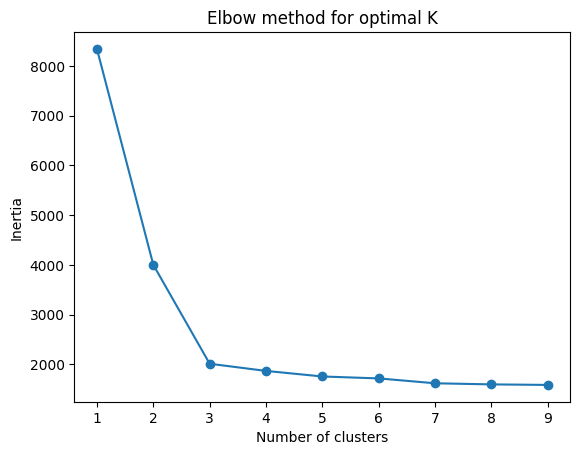

In [ ]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import pandas as pd

inertia_values = []
k_values = range(1, 10)
for k in k_values:
  kmedoids = KMedoids(n_clusters = k, metric = "manhattan", random_state = 2024)
  kmedoids.fit(df)
  inertia_values.append(kmedoids.inertia_)

plt.plot(k_values, inertia_values, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method for optimal K")
plt.show()